In [22]:
from multiprocessing import cpu_count
import gensim
import smart_open
import os
import nltk
import pandas as pd
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('russian')
from gensim.models import Word2Vec
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
import pandas as pd
import numpy as np
#from gensim.similarities import WordEmbeddingSimilarityIndex #doesn't work, i don't know why
#from gensim.similarities import SparseTermSimilarityMatrix
#from gensim.matutils import softcossim2021-03-20 12:11:12,247

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [23]:
path_to_prepr_data = "/content/drive/MyDrive/sharing/datasets/avito/preprocessed_data"
prepr_queries_data = pd.read_csv(path_to_prepr_data + "/prepr_queries.csv", header = None)
prepr_descriptions_data = pd.read_csv(path_to_prepr_data + "/prepr_descriptions.csv", header = None,\
                                      sep = '>>', engine = 'python')

prepr_descriptions_data.head(10)

0
0                          0 гобелен размер xxxхxxсй
1  1 продавать недорого x стул из светлый прессов...
2  2 мини баня минять сауна предназначать для при...
3  3 продавать эксклюзивный коллекция книга выпус...
4  4 продаваться ноутбук acer ex-xxxcxta купить в...
5           5 состояние хороший иметься теплый чехол
6  6 смесь молочный адаптировать ультрапастеризов...
7  7 час абсолютно новый с коробка час китай быть...
8  8 санаторий белоруссия лепельский военный цена...
9  9 фотохолвать на подрамник xxхxxс галерейнать ...

In [ ]:
docs = []
print(prepr_descriptions_data.values[179421])
print(prepr_queries_data.values[179421])
for s in prepr_descriptions_data.values.flatten():
    print(s[1:])
    docs.append([list(s[0]), list(s[1:])])

Streaming output truncated to the last 5000 lines.
463 маршрутизатор asus rt nxx новый в запечатать упаковка на гарантия магазин цена новый в магазин регион от xxxx и высокий
464 виниловый пластинка иосиф::кабзон
465 размер xxxхxx xx /xxхxx смотреть цвет итальянский орех
466 в планшет чуть треснуть экран загружаться и работать хорошо смотреть и задавать весь вопрос можно по адрес в магазин гамидов а рядом с магазин дверь рамас
467 тип цп quadcore интел core ix-xxxx тактовый частота xxxx мгц объем кэша lx xx килобайт объем кэша lx xxxx килобайт объем кэша lx xxxx килобайт ddrx kingston hyperx xgb память тактовый частота xxxx мгц жесткий диск western digital wdxxxxfaex xtb sata iii системный плата asus pxpxx le atx форм-фактор xx usb из они usb x.x nvidia geforce gts видеокарт xxx xgb dvi разъема поддержка hdcp hdmi vga блок питание на xxxw dvd привод весь это находиться в корпус inwin вместе с системником отдавать беспроводный клавиатура и мышь logitech звонить с xx:xx до xx:xx в другой

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
0610 защитный пленка вроде матовый мочь наклеить
0611 распродажа сезонный скидка снижение цена сосуд холодный чай квас пиво компот и др напиток керамика российский производство для пищевой продукт высота xx сантиметр в наличие в москва отличный подарок как себя так и свой любимый огромный количество керамический посуда под заказ оптовик скидка возможный самовыз метр .улийский академик янгель доставка в предел мкад xxx рубль писать звонить
0612 замок в дверь входной или на гараж комплект ключ в наличие
0613 отличный состояние быть новый насадкий -щетка запечатать в паковка +xxx река все вместе xxx рождение оивечать только на звонок
0614 продавать жесткий без пружинный ортопедический матрац на основа кокосовый койр x-спальный размер xxx х xxx чехол из плотный жаккард тёгать на молния бежевый цвета,высота xx сантиметр в отличный состояние
0615 портфель не б/у не жесткий цвет стараться показывать на фото кожа качественный размер xxхxxсй уп

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



8179 золотой час на кожаный ремне,с золотой застежка покупать новый в московский монетный дворе xxx проба,розовый золото,xx,xx грамм швейцарский механизм.практически новый
8180 длина смотреть ширина xx сантиметр противоскользить материал обратный сторона удерживать ковер на место латекснать изнанка ковер не скользить легкий поддерживать в чистота выбивать на улица или чистить с помощь пылесос
8181 продавать радио система linex xd в отличный состояние отправлять куда угодно быть два штука цифровая вокальный беспроводный система с ручной передатчик vxx-hhtx нести частота x,x ггц x канал радиус действие до xx метр диапазон часота xxгц::-xxкгц динамический диапазон до xxx дб моделирование звучание микрофон shure smxx работа передатчик от x-й батарейка aa до x час
8182 конек в хороший состояние размер x ee
8183 продавать телефон или поменяе на айфон
8184 mig восток инверторный сварочный аппарат предназначать для полуавтоматический сварка в среда защитный газ mig/mag с возможность ручной дуг

In [7]:
prepr_queries = prepr_queries_data.values.flatten().tolist()
prepr_descriptions = prepr_descriptions_data['0'].values.flatten().tolist()
def tokenize(tokenized_list, documents):
  for line in documents:
    text = line.split()
    text = [word for word in text if word not in stop_words]
    tokenized_list.append(text)

descriptions_tokens = []
tokenize(descriptions_tokens, prepr_descriptions)
queries_tokens = []
tokenize(queries_tokens, prepr_queries)
all_torens = (queries_tokens + descriptions_tokens)


KeyboardInterrupt: ignored

In [ ]:
model = gensim.models.Word2Vec(all_torens, size = 300, window = 50, min_count=1, workers=cpu_count(), seed=12345)


2021-03-20 23:34:41,084 : INFO : collecting all words and their counts
2021-03-20 23:34:41,087 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2021-03-20 23:34:41,117 : INFO : PROGRESS: at sentence #10000, processed 35722 words, keeping 11286 word types
2021-03-20 23:34:41,134 : INFO : PROGRESS: at sentence #20000, processed 71709 words, keeping 18401 word types
2021-03-20 23:34:41,154 : INFO : PROGRESS: at sentence #30000, processed 107592 words, keeping 24285 word types
2021-03-20 23:34:41,176 : INFO : PROGRESS: at sentence #40000, processed 143390 words, keeping 29382 word types
2021-03-20 23:34:41,199 : INFO : PROGRESS: at sentence #50000, processed 179031 words, keeping 34109 word types
2021-03-20 23:34:41,222 : INFO : PROGRESS: at sentence #60000, processed 215221 words, keeping 38482 word types
2021-03-20 23:34:41,247 : INFO : PROGRESS: at sentence #70000, processed 251121 words, keeping 42582 word types
2021-03-20 23:34:41,271 : INFO : PROGRESS: at se

In [ ]:
model.save('/content/drive/MyDrive/sharing/models/word2vec.model')
#model = gensim.models.Word2Vec.load('/content/drive/MyDrive/sharing/models/word2vec.model')

2021-03-20 23:44:58,551 : INFO : saving Word2Vec object under /content/drive/MyDrive/sharing/models/word2vec.model, separately None
2021-03-20 23:44:58,555 : INFO : storing np array 'vectors' to /content/drive/MyDrive/sharing/models/word2vec.model.wv.vectors.npy
2021-03-20 23:45:06,542 : INFO : not storing attribute vectors_norm
2021-03-20 23:45:06,552 : INFO : storing np array 'syn1neg' to /content/drive/MyDrive/sharing/models/word2vec.model.trainables.syn1neg.npy
2021-03-20 23:45:14,852 : INFO : not storing attribute cum_table
2021-03-20 23:45:17,964 : INFO : saved /content/drive/MyDrive/sharing/models/word2vec.model


In [ ]:
import random #может выдасть error, если слова из запроса нет в словаре, надо будет как-то отдельно обработать этот случай, наверное
doc_id = random.randint(0, len(queries_tokens) - 1)
print("query: ", queries_tokens[doc_id])
for word in queries_tokens[doc_id]:
  print (model.wv.most_similar(word), "\n")

query:  ['коэльо', 'пауло', 'дневник', 'маг']
[('пауло', 0.9425636529922485), ('бовари', 0.8358869552612305), ('дюма', 0.8327620029449463), ('песнь', 0.8304118514060974), ('уард', 0.8270337581634521), ('гюго', 0.8259432911872864), ('террор', 0.8232928514480591), ('стругацкий', 0.8210042715072632), ('похождение', 0.8200820684432983), ('санд', 0.8192247748374939)] 

[('коэльо', 0.9425634741783142), ('дюма', 0.8923757672309875), ('стругацкий', 0.8796116709709167), ('анж', 0.8765596151351929), ('санд', 0.8757352828979492), ('вильмонт', 0.8698949217796326), ('тургеневой', 0.8646760582923889), ('дура', 0.8627873659133911), ('золя', 0.862662672996521), ('паганини', 0.8625853061676025)] 

[('стихотворение', 0.8490828275680542), ('избирать', 0.8482840657234192), ('поэма', 0.8316942453384399), ('литературный', 0.8310956954956055), ('очерк', 0.8227427005767822), ('новелла', 0.819648027420044), ('повесть', 0.8164722919464111), ('смерть', 0.8149464130401611), ('поэт', 0.8137438297271729), ('проза',

In [ ]:
# from sklearn import cluster
# clusters_number = 1 # 20000
# word_vectors = model.wv[model.wv.vocab]
# kmeans = cluster.KMeans(n_clusters = clusters_number)
# print(word_vectors)
# kmeans.fit(word_vectors)
# kmeans.save("/content/drive/MyDrive/sharing/models/kmeans")
# labels = kmeans.labels_
# centroids = kmeans.cluster_centers_

[[ 2.5113139e+00 -1.8357137e-01 -4.9025903e+00 ...  2.2168291e+00
   6.3526001e+00  2.3399289e+00]
 [ 5.3295362e-01  2.8776250e+00  1.2344967e+00 ...  2.2450919e+00
  -2.9155037e-01 -2.3067887e+00]
 [ 3.0307820e-01  1.6293748e-01  8.7475523e-02 ...  6.3513264e-02
   1.0412400e+00  1.5943412e-01]
 ...
 [ 4.1810251e-03  1.3083056e-02 -1.9792654e-02 ... -1.4812671e-02
  -1.4127895e-03 -1.9038813e-02]
 [-1.0830052e-02 -2.4402859e-03  9.2498530e-03 ...  9.7759236e-03
  -1.2165306e-02  1.1106463e-02]
 [-2.1827187e-02 -1.4531268e-02  3.2854031e-04 ...  2.9544588e-02
  -1.4266713e-02  7.3700547e-03]]


AttributeError: ignored

In [ ]:
doc_id = random.randint(0, len(test_queries) - 1)

print(model.wv.get_vector(queries_tokens[doc_id][0]).shape)
word_vectors_queries = [model.wv.get_vector(queries_tokens[doc_id][i]) for i in range(len(queries_tokens[doc_id]))]
print(queries_tokens[doc_id])
#doc_id = random.randint(0, len(descriptions_tokens) - 1)
word_vectors_desc = [model.wv.get_vector(descriptions_tokens[doc_id][i])for i in range(len(descriptions_tokens[doc_id]))]
print(descriptions_tokens[doc_id])
#word_vectors_queries = kmeans.transform(word_vectors_queries)
#word_vectors_desc  = kmeans.transform(word_vectors_desc)
print(doc_id)

(300,)
['samsung', 'galaxy', 'tab', 'x', '10.1', 'xx', 'чехол']
['большой', 'шкаф', 'двухсекциоть', 'четыре', 'дверь', 'зеркало', 'секция', 'полка', 'второй', 'вешалки.цвет', 'светлый', 'дубль']
179421


In [ ]:
import numpy as np
from scipy.spatial import distance

#print(word_vectors_queries, "\n________\n", word_vectors_desc)
#print(word_vectors_desc.shape)
word_vectors_queries = np.sum(word_vectors_queries, axis = 0)
word_vectors_desc = np.sum(word_vectors_desc, axis = 0)
print(word_vectors_queries, "\n________\n", word_vectors_desc)
print(word_vectors_desc.shape)
print(1 - distance.cosine(word_vectors_queries/word_vectors_queries.shape[0], word_vectors_desc/word_vectors_desc.shape[0]))

[ 5.7860050e+00  6.1175056e+00 -6.0297747e+00 -3.8242755e+00
 -1.6874013e+00 -7.0249920e+00  8.9922887e-01  6.3693094e+00
 -4.2282038e+00 -6.0610723e+00  9.7008175e-01  2.5580511e+00
 -3.5842900e+00 -4.8706303e+00  8.8675613e+00 -9.5382106e-01
 -4.8797083e+00 -5.2252893e+00 -8.0579185e-01 -5.0981724e-01
 -1.6754409e+00  5.6627564e+00  4.0695829e+00  5.2457209e+00
 -2.3071778e+00  6.1765375e+00  3.1244490e+00  1.4646159e+00
  3.0673616e+00 -3.9215500e+00  5.7233977e+00  6.7001958e+00
 -1.1794845e+00  2.9443192e+00 -1.0083153e+01 -4.6249766e+00
  1.5000045e+00  1.9903249e+00  9.3912735e+00 -6.5428314e+00
 -3.1509297e+00 -7.2049389e+00 -9.6733809e-02 -1.1145502e+00
  5.1116052e+00 -5.2567902e+00  2.3136904e+00  8.7925225e-01
  1.6741810e+00  1.7886198e+00  4.3896389e+00 -3.0874383e+00
 -4.1876781e-01 -1.6491413e-03  1.9102108e-01 -1.4669987e+00
  2.7856302e-01 -2.6773310e-01  1.2602273e+00 -1.1923471e+01
 -1.5841118e+00 -1.7800928e+00 -4.5091205e+00  3.6570103e+00
 -1.9547246e+00  5.25445

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
 
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [ ]:
def tsnescatterplot(model, word, list_names):
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    arrays = np.empty((0, 300), dtype='f')
    word_labels = [word]
    color_list  = ['red']

    # adds the vector of the query word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    # gets list of most similar words
    close_words = model.wv.most_similar([word])
    
    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('blue')
        arrays = np.append(arrays, wrd_vector, axis=0)
    
    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)
        
    # Reduces the dimensionality from 300 to 50 dimensions with PCA
    reduc = PCA().fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
    
    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )
    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)

    
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
            
    plt.title('t-SNE visualization for {}'.format(word.title()))

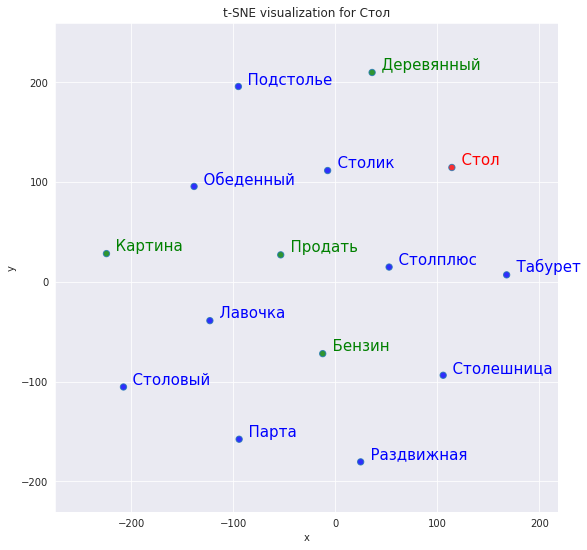

In [ ]:
tsnescatterplot(model, 'стол', ['продать','бензин', 'картина', 'деревянный'] )

In [ ]:
from sklearn.decomposition import IncrementalPCA    # inital reduction
from sklearn.manifold import TSNE                   # final reduction
import numpy as np                                  # array handling


def reduce_dimensions(model):
    num_dimensions = 2  # final num dimensions (2D, 3D, etc)

    # extract the words & their vectors, as numpy arrays
    vectors = np.asarray(model.wv.vectors)
    labels = np.asarray(model.wv.index2word) # fixed-width numpy strings

    # reduce using t-SNE
    tsne = TSNE(n_components=num_dimensions, random_state=0)
    vectors = tsne.fit_transform(vectors)

    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    return x_vals, y_vals, labels


x_vals, y_vals, labels = reduce_dimensions(model)

def plot_with_plotly(x_vals, y_vals, labels, plot_in_notebook=True):
    from plotly.offline import init_notebook_mode, iplot, plot
    import plotly.graph_objs as go

    trace = go.Scatter(x=x_vals, y=y_vals, mode='text', text=labels)
    data = [trace]

    if plot_in_notebook:
        init_notebook_mode(connected=True)
        iplot(data, filename='word-embedding-plot')
    else:
        plot(data, filename='word-embedding-plot.html')


def plot_with_matplotlib(x_vals, y_vals, labels):
    import matplotlib.pyplot as plt
    import random

    random.seed(0)

    plt.figure(figsize=(12, 12))
    plt.scatter(x_vals, y_vals)

    #
    # Label randomly subsampled 25 data points
    #
    indices = list(range(len(labels)))
    selected_indices = random.sample(indices, 25)
    for i in selected_indices:
        plt.annotate(labels[i], (x_vals[i], y_vals[i]))

try:
    get_ipython()
except Exception:
    plot_function = plot_with_matplotlib
else:
    plot_function = plot_with_plotly

plot_function(x_vals, y_vals, labels)

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/sharing/datasets/avito/raw_data/train.csv")